In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the Dataset
df_b = pd.read_csv("C:/Users/Apshan Banu/Downloads/2_udid_data.csv")

In [4]:
df_b.head()

,state_name,district_name,disability_type,age_lower,age_upper,Male_count,female_count,total
0,Maharashtra,Yavatmal,Acid Attack Victim,35,60,1,0,1
1,Maharashtra,Yavatmal,Acid Attack Victim,60,80,0,1,1
2,Haryana,Yamunanagar,Acid Attack Victim,15,35,1,0,1
3,Haryana,Yamunanagar,Acid Attack Victim,35,60,4,0,4
4,Karnataka,Yadgir,Acid Attack Victim,15,35,5,8,13


 the distribution of various disabilities within the dataset, providing insights into the prevalence or frequency of different types of disabilities recorded or reported.

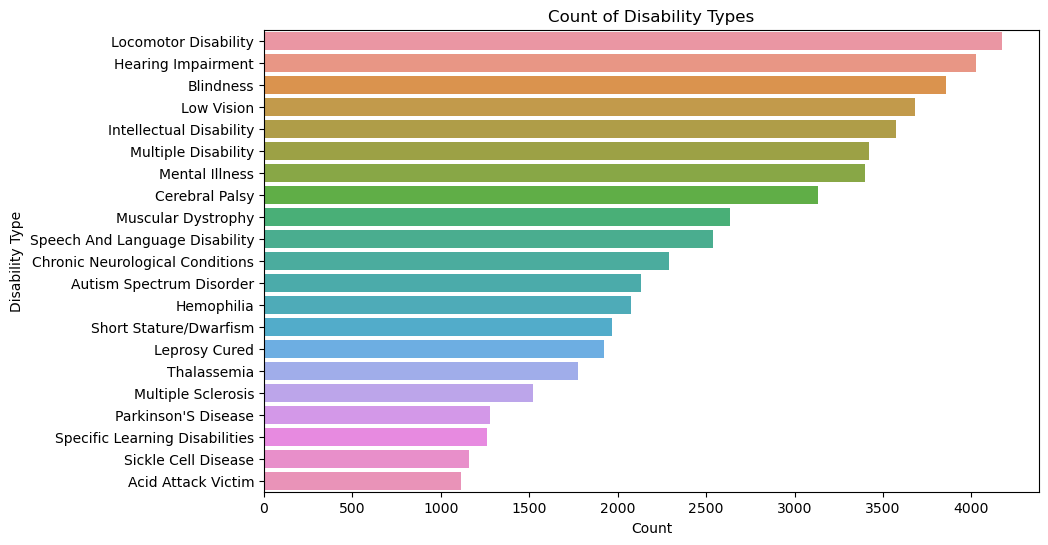

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(y='disability_type', data=df_b, order=df_b['disability_type'].value_counts().index)
plt.title('Count of Disability Types')
plt.xlabel('Count')
plt.ylabel('Disability Type')
plt.show()

This visualization offers a comprehensive view of how disability types are distributed across various states, enabling comparative analysis and identifying states with higher prevalence in specific disability categories.

<Figure size 1400x800 with 0 Axes>

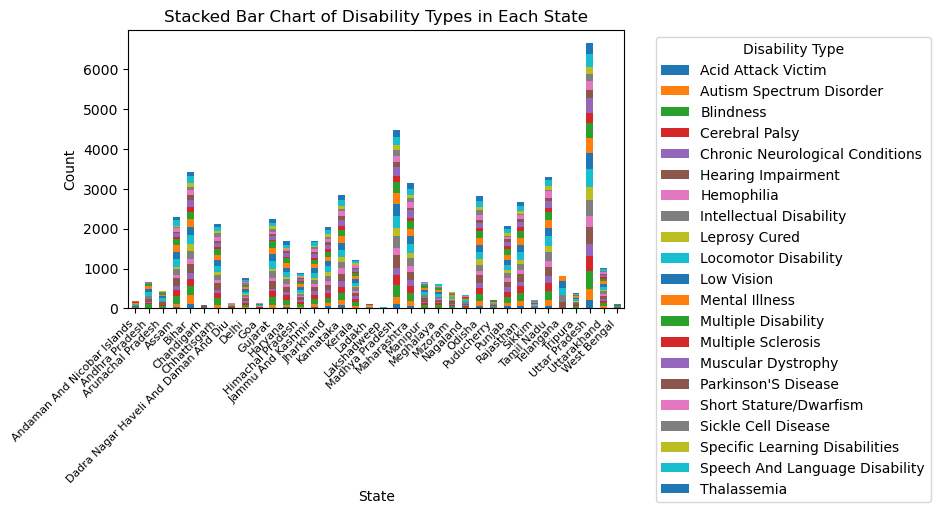

In [8]:
plt.figure(figsize=(14, 8))

# Grouping data and creating the stacked bar chart
df_b_grouped = df_b.groupby(['state_name', 'disability_type']).size().unstack().fillna(0)
df_b_grouped.plot(kind='bar', stacked=True)

# Customizing the chart properties
plt.title('Stacked Bar Chart of Disability Types in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Disability Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability and increase spacing
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.subplots_adjust(bottom=0.3)

plt.show()


 this scatter plot with z-scores allows for a standardized comparison of Male and Female counts, highlighting their deviations from the mean and potential relationships between these standardized counts.

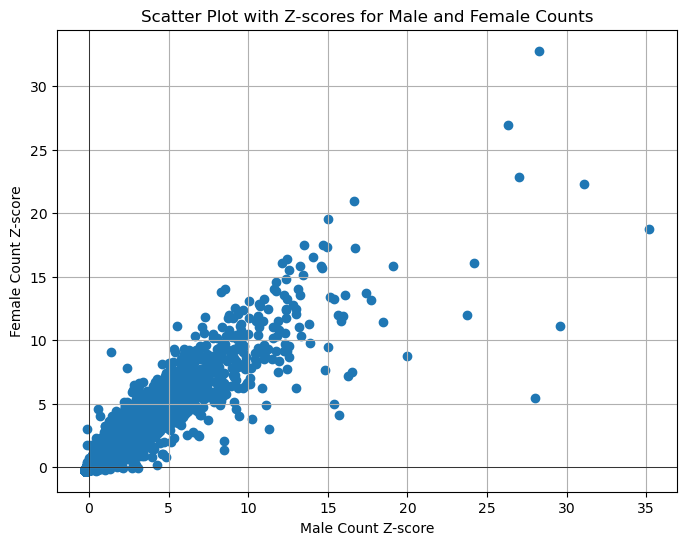

In [10]:
from scipy.stats import zscore
# Calculate z-scores for columns 'Male_count' and 'female_count'
df_b['Male_count_zscore'] = zscore(df_b['Male_count'])
df_b['female_count_zscore'] = zscore(df_b['female_count'])

# Scatter plot with z-scores
plt.figure(figsize=(8, 6))
plt.scatter(df_b['Male_count_zscore'], df_b['female_count_zscore'])
plt.title('Scatter Plot with Z-scores for Male and Female Counts')
plt.xlabel('Male Count Z-score')
plt.ylabel('Female Count Z-score')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

This performs both statistical analysis and visualization, providing descriptive insights into the distribution of Male and Female counts using box plots.

Text(0.5, 1.0, 'Box plot for Male and Female Counts')

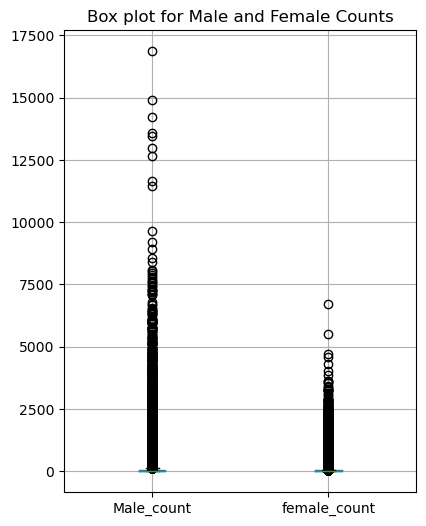

In [12]:
statistics = df_b.describe()

# Visualization using box plot and bar plot
plt.figure(figsize=(10, 6))

# Box plot for 'Male_count' and 'female_count'
plt.subplot(1, 2, 1)
df_b.boxplot(column=['Male_count', 'female_count'])
plt.title('Box plot for Male and Female Counts')



This visualizes specific descriptive metrics (mean and median) for Male and Female counts using a bar plot, facilitating a comparison between these central tendency measures for the dataset.

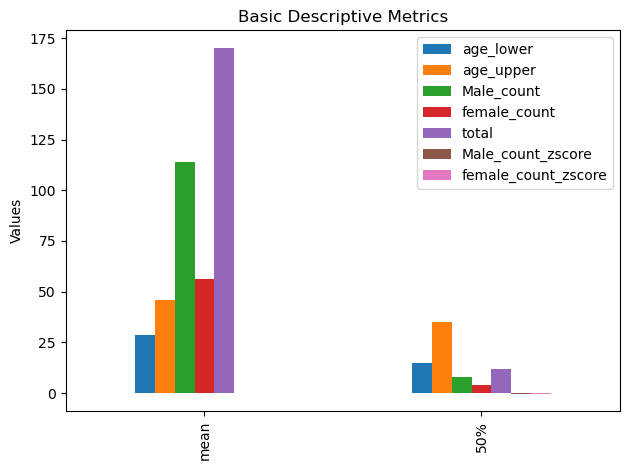

In [15]:

statistics.loc[['mean', '50%']].plot(kind='bar', legend=True)
plt.title('Basic Descriptive Metrics')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

ECDF plot to visualize the cumulative distribution of age ranges in Dataset B, providing insights into the distribution and probability density across various age groups.

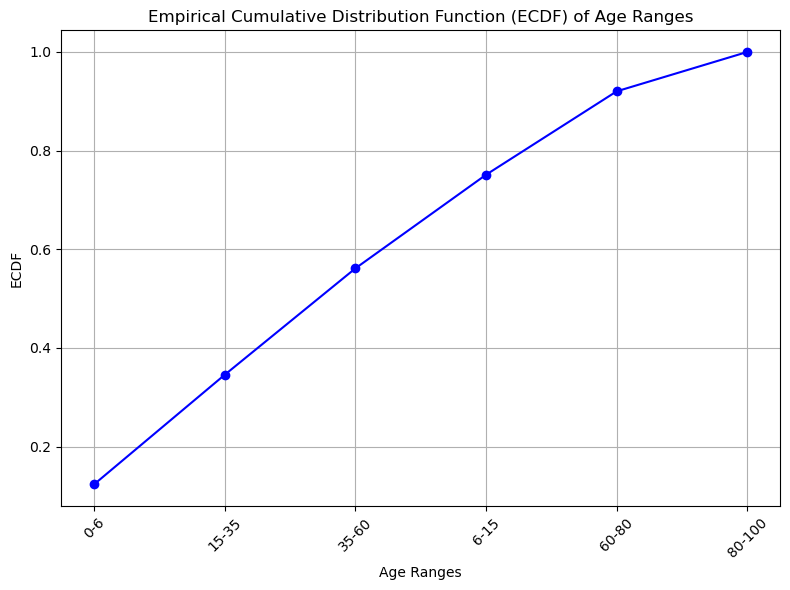

In [21]:
import numpy as np
# Create ECDF for age ranges
age_ranges = df_b['age_range'].value_counts().sort_index()
x = np.sort(age_ranges.index)
y = np.cumsum(age_ranges.values) / np.sum(age_ranges.values)

# Plotting ECDF
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('ECDF')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 quick overview of the distribution and frequency of different age ranges within Dataset

Text(0, 0.5, 'Count')

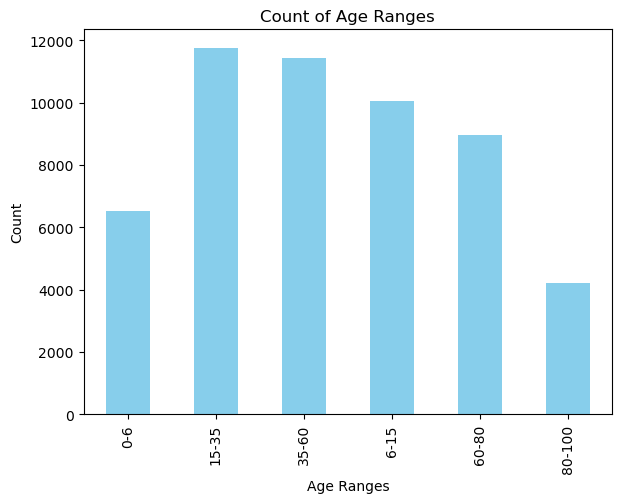

In [18]:
df_b['age_range'] = df_b['age_lower'].astype(str) + '-' + df_b['age_upper'].astype(str)

# Plotting the histogram for age ranges
plt.figure(figsize=(15, 5))

# Histogram for age ranges
plt.subplot(1, 2, 1)
df_b['age_range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Count')

These KDE plots offer a visual summary of the density distributions of ages represented by 'age_lower' and 'age_upper' columns, providing insights into the spread, concentration, and probabilities associated with different age values within Dataset B.

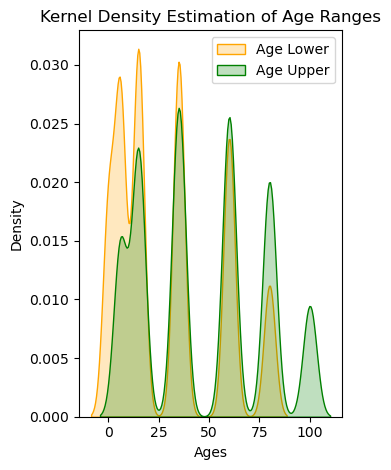

In [19]:
plt.subplot(1, 2, 2)
sns.kdeplot(df_b['age_lower'], shade=True, color='orange')
sns.kdeplot(df_b['age_upper'], shade=True, color='green')
plt.title('Kernel Density Estimation of Age Ranges')
plt.xlabel('Ages')
plt.ylabel('Density')
plt.legend(['Age Lower', 'Age Upper'])

plt.tight_layout()
plt.show()

This pie chart effectively summarizes and visualizes the distribution of different disability types within the dataset, highlighting their proportional representation relative to one another.

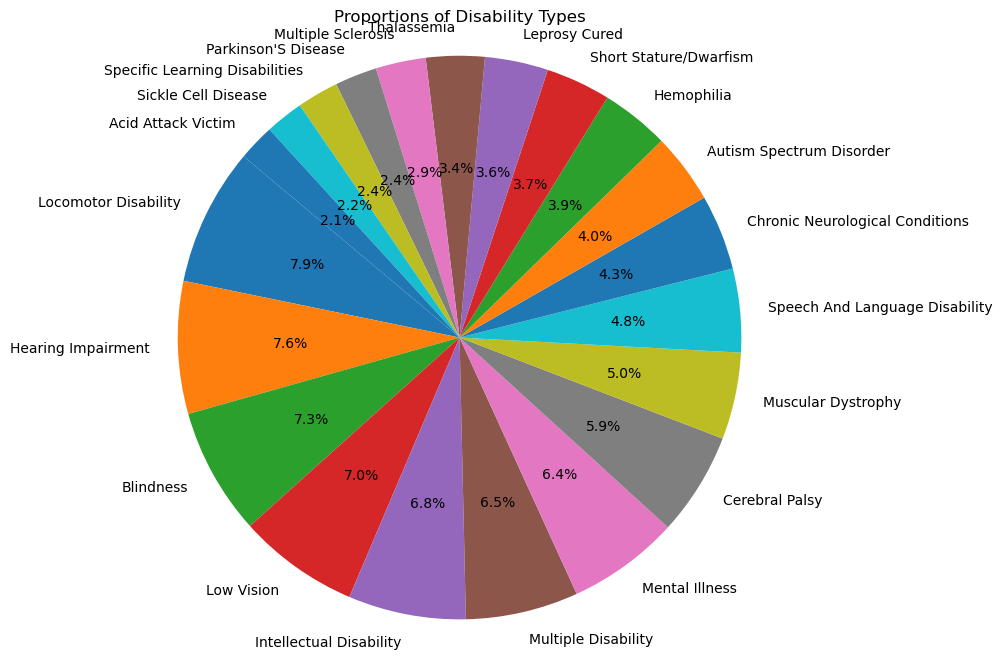

In [23]:
disability_counts = df_b['disability_type'].value_counts()

# Plotting a pie chart for disability types
plt.figure(figsize=(8, 8))
plt.pie(disability_counts, labels=disability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Disability Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

This strip chart is effective in presenting the distribution of male and female counts within Dataset B, displaying individual data points for each gender category, and providing insights into the distribution patterns and variations between the counts of males and females.

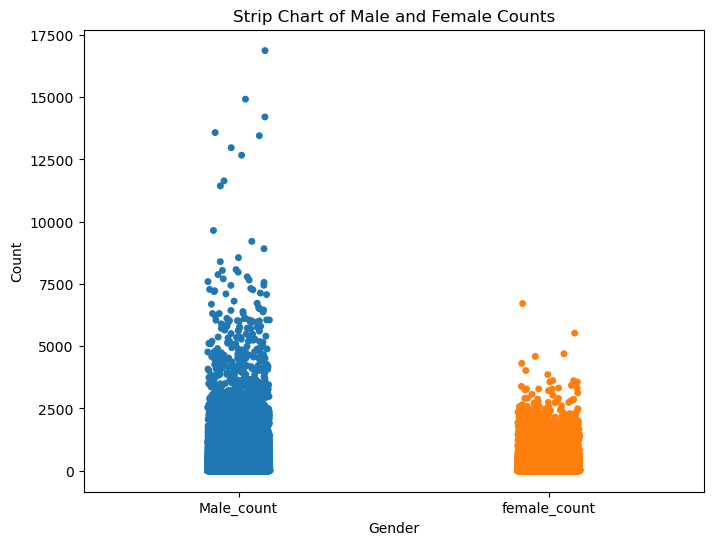

In [29]:

# Create strip chart for Male and Female counts
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_b[['Male_count', 'female_count']], jitter=True)
plt.title('Strip Chart of Male and Female Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


This violin plot provides a detailed representation of the distributions of male and female counts in Dataset B, presenting the density and spread of counts for each gender category and allowing for a comparative analysis of their distributions.


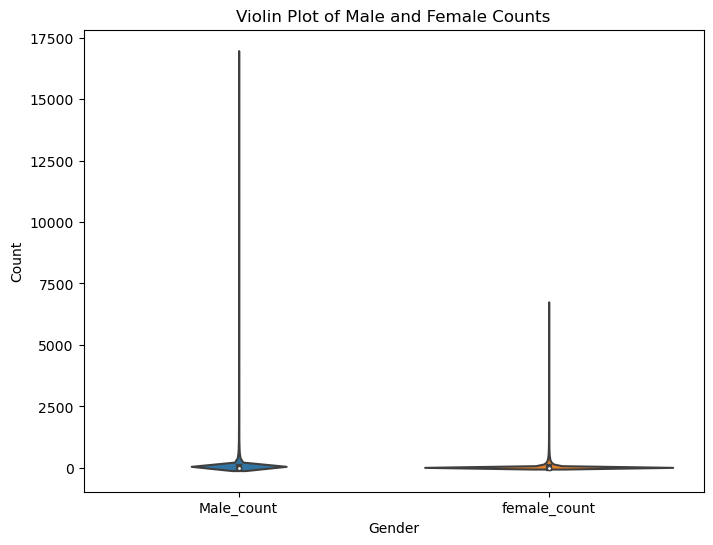

In [30]:

# Create violin plot for Male and Female counts
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_b[['Male_count', 'female_count']])
plt.title('Violin Plot of Male and Female Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()